# Типы корреляций. Корреляция Пирсона

*В прошлом юните мы рассчитали силу взаимосвязи (коэффициент корреляции) между двумя переменными point и price, используя метод df.corr(). Однако, если мы внимательно прочтём документацию к этому методу, мы заметим, что он принимает в себя несколько аргументов.*

### Задание 4.1

*Внимательно изучите документацию к методу df.corr(). Что означает аргумент method в df.corr()?*

*Аргумент method указывает на название используемого метода расчёта корреляции: 'pearson' — корреляция Пирсона, 'kendall' — корреляция Кендалла, 'spearman' — корреляция Спирмена. Каждый метод может быть применён для разных типов данных. Давайте разберёмся, чем отличаются эти методы и для каких типов данных применять каждый из них.*

## Корреляция Пирсона

*Рассчитав в прошлом юните коэффициент корреляции между point и price, мы использовали df.corr(). Согласно документации, если не указать method, по умолчанию используется корреляция Пирсона. Верно ли это для наших признаков?*

***Коэффициент корреляции Пирсона*** *используется для вычисления линейной взаимосвязи между признаками.*

***Линейная взаимосвязь*** *— вид связи между признаками, в котором изменение одного признака  всегда приводит к изменению другого признака  на величину, пропорциональную изменению , в соответствии с правилом:  (уравнение прямой), где  и  — некоторые коэффициенты.*

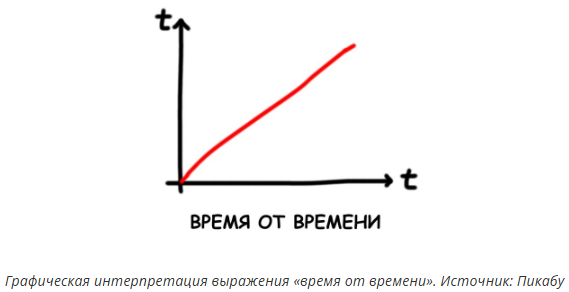

*Определить существование линейной связи в паре признаков эмпирическим путем можно, если вы можете формулировать фразу про признаки: «С уменьшением/увеличением признака 1 уменьшается/увеличивается признак 2 в соответствии с некоторым уравнением прямой».*

*Например, с увеличением возраста заёмщика уменьшается количество дней просрочки по кредиту.*

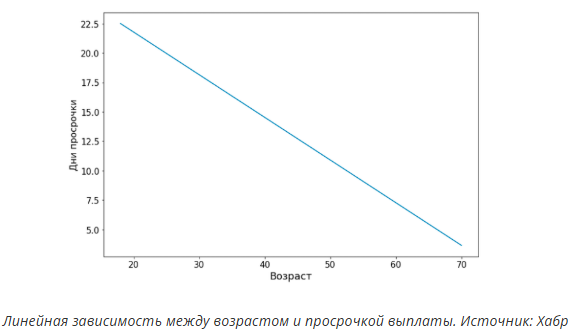

*Более точной является ***визуализация зависимости признаков.*** С этим подходом мы подробнее познакомимся в следующем юните, посвящённом визуализации связей между признаками.*

*Для большинства непрерывных признаков это подходящий метод вычисления коэффициента корреляции. Однако при его использовании вы предполагаете, что признаки приблизительно нормально распределены и не имеют выбросов.*

## нормальное распределение

*Большинство окружающих нас процессов и явлений, характеристик объектов можно описать ***нормальным распределением.*** В основном это переменные, которые зависят от множества факторов, например рост человека. Он сформировался благодаря местности, в которой проживает человек, генетическим предрасположенностям, перенесённым заболеваниям и так далее. Как следствие, показатели роста подвергаются законам нормального распределения.*

*Если признак является совокупностью ***очень редких событий***, например аварии на дорогах, то распределение признака нормальным не будет.*

*С точки зрения визуализации нормальное (гауссово) распределение представляет собой распределение признака в виде колокола.*

*Нормальность распределения признака можно определить визуально, построив гистограмму распределения непрерывного признака или так называемый ***q-q plot.*** Подробнее о принципе построения данного графика советуем прочитать [здесь.](https://habr.com/ru/articles/578754/)*

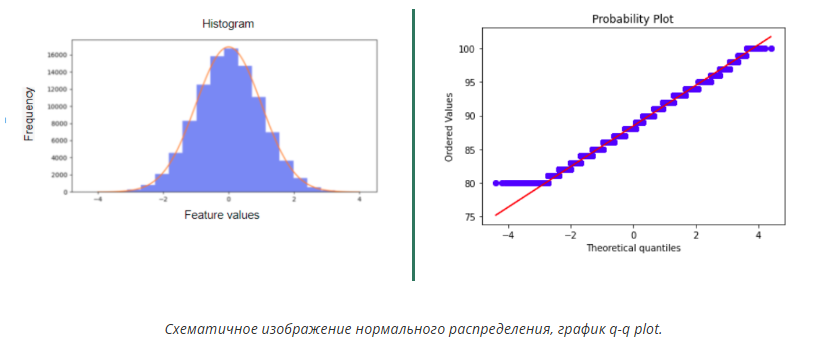

*На гистограмме распределение должно напоминать колокол (левый график на рисунке), а q-q plot должен напоминать прямую линию (правый график на рисунке).*

*Давайте проверим наши данные винных обзоров на нормальность, используя метод визуализации.*

*Для этого воспользуемся пакетом [stats](https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats) статистических распределений и функций, а также знакомой нам библиотекой matplotlib для построения графиков.*

*Код для построения графиков:*

In [7]:
import pandas as pd
import statistics
wine_data = pd.read_csv('data/wine_cleared.csv', sep=',')
display(wine_data[wine_data['price'] >=2000])

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,title,variety,winery
15840,15840,France,The wine is a velvet glove in an iron fist. Th...,unknown,96,2500.0,Bordeaux,Pomerol,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
65352,65352,France,This extravagantly perfumed wine has great jui...,unknown,97,2000.0,Bordeaux,Pomerol,Roger Voss,@vossroger,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,Château Pétrus
80290,80290,France,This ripe wine shows plenty of blackberry frui...,unknown,88,3300.0,Bordeaux,Médoc,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
98380,98380,France,"A superb wine from a great year, this is power...",unknown,96,2500.0,Burgundy,La Romanée,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
113564,113564,France,"A wonderfully complete wine, with all the elem...",unknown,96,2000.0,Burgundy,La Romanée,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2005 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair
120391,120391,US,The nose on this single-vineyard wine from a s...,Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Matt Kettmann,@mattkettmann,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,Blair


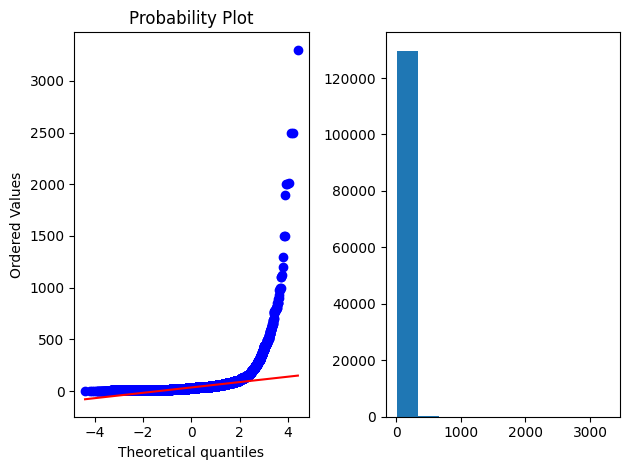

In [ ]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wine_data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

*Кажется, признак распределён ненормально, так как q-q plot имеет изогнутую линию, а гистограмма распределения совершенно не похожа на колокол.*

*Такой признак при анализе Пирсоном может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований, которые вы освоите позже, в юнитах про разведывательный анализ данных.*

### Задание 4.2

*Постройте приведённые выше графики для признака points из датасета винных обзоров и выберите верное утверждение:*

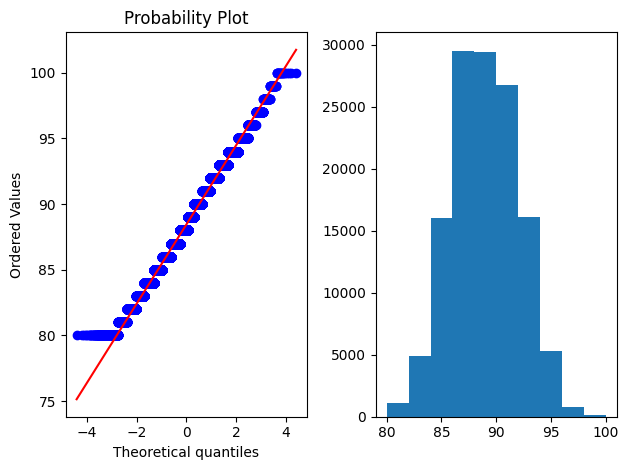

In [11]:
plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(wine_data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

### Задание 4.3

*Выберите верные утверждения:*

![image.png](attachment:image.png)

### Итак, что мы узнали в этом юните?

- *Корреляция между непрерывными признаками, которые имеют близкое к нормальному распределение, может быть рассчитана с использованием стандартной корреляции Пирсона.*
- *Для категориальных данных используется методы ранговой корреляции, например Спирмена и Кендалла, которые будут изучены в следующем юните.*
- *Для непрерывных переменных, имеющих большое количество выбросов или распределённых ненормально, могут использоваться методы по устранению выбросов и нормализации данных, которые будут изучены далее в курсе. Также могут быть использованы методы ранговой корреляции.*

В следующем юните вы познакомитесь c другими типами корреляции: Спирмена, Кендалла и Мэтьюса.